<a href="https://colab.research.google.com/github/DavyL0/credit-analyse/blob/main/mod12_ex03_regressa%CC%83o_mu%CC%81ltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import numpy as np
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
y1, X1 = patsy.dmatrices('tip ~ smoker + sex+ time + net_bill', data=tips)

reg1 = sm.OLS(y1, X1).fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           2.64e-20
Time:                        13:34:47   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
y2, X2 = patsy.dmatrices('tip ~ time + net_bill', data=tips)

reg2 = sm.OLS(y2, X2).fit()

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.11
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           6.62e-22
Time:                        13:35:35   Log-Likelihood:                -375.58
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3015      0.191      6.798      0.000       0.924       1.679
time[T.Dinner]     0.0531      0.165      0.322      0.747      -0.271       0.378
net_bill           0.0988      0.009     10.718      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.453   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.186
Skew:                           0.746   Prob(JB):                     1.41e-13
Kurtosis:                       4.897   Cond. No.                         56.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
ylog, Xlog = patsy.dmatrices('tip ~ time + np.log(net_bill)', data=tips)

reg_log = sm.OLS(ylog, Xlog).fit()

reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.47
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           4.90e-19
Time:                        13:36:42   Log-Likelihood:                -382.27
No. Observations:                 244   AIC:                             770.5
Df Residuals:                     241   BIC:                             781.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2818      0.433     -2.959      0.003      -2.135      -0.428
time[T.Dinner]       0.0871      0.169      0.515      0.607      -0.246       0.420
np.log(net_bill)     1.5553      0.159      9.792      0.000       1.242       1.868
==============================================================================
Omnibus:                       72.482   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.348
Skew:                           1.282   Prob(JB):                     4.70e-47
Kurtosis:                       6.796   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
ypol, Xpol = patsy.dmatrices('tip ~ time + np.power(net_bill,2)', data=tips)

reg_pol = sm.OLS(ypol, Xpol).fit()

reg_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     52.09
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           1.58e-19
Time:                        13:37:52   Log-Likelihood:                -381.12
No. Observations:                 244   AIC:                             768.2
Df Residuals:                     241   BIC:                             778.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1895      0.151     14.517      0.000       1.892       2.487
time[T.Dinner]            0.1032      0.168      0.615      0.539      -0.228       0.434
np.power(net_bill, 2)     0.0021      0.000      9.954      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.350   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.099
Skew:                           0.608   Prob(JB):                     1.77e-07
Kurtosis:                       4.258   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [11]:
results = smf.ols('''
                    np.log(tip_pct) ~ sex
                                + smoker
                                + time
                                + net_bill
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           3.16e-13
Time:                        13:45:16   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2888      0.080    -16.032      0.000      -1.447      -1.130
sex[T.Female]      0.0168      0.052      0.323      0.747      -0.085       0.119
smoker[T.No]      -0.0055      0.050     -0.110      0.912      -0.104       0.093
time[T.Dinner]     0.0171      0.056      0.307      0.759      -0.093       0.127
net_bill          -0.0259      0.003     -8.371      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.301   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.688
Skew:                           0.650   Prob(JB):                     1.82e-56
Kurtosis:                       7.854   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ypol, Xpol = patsy.dmatrices('tip ~ time + np.power(net_bill,2)', data=tips)

reg_pol = sm.OLS(ypol, Xpol).fit()

reg_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.31
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           8.67e-21
Time:                        15:49:38   Log-Likelihood:                -88.627
No. Observations:                 244   AIC:                             191.3
Df Residuals:                     237   BIC:                             215.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3111      0.202     -1.543      0.124      -0.708       0.086
C(size)[T.2]         0.2169      0.187      1.161      0.247      -0.151       0.585
C(size)[T.3]         0.3430      0.200      1.712      0.088      -0.052       0.738
C(size)[T.4]         0.4559      0.206      2.210      0.028       0.049       0.862
C(size)[T.5]         0.4122      0.255      1.618      0.107      -0.090       0.914
C(size)[T.6]         0.6721      0.270      2.493      0.013       0.141       1.203
np.log(net_bill)     0.3810      0.059      6.420      0.000       0.264       0.498
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.912
Skew:                           0.108   Prob(JB):                       0.0116
Kurtosis:                       3.911   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y1, X1 = patsy.dmatrices('tip_pct ~ smoker + sex+ time + net_bill', data=tips)

r1 = reg1.params[1]
r1**2

0.0012308717052476386

In [23]:
reg = smf.ols('np.log(tip_pct) ~ C(size) + np.power(net_bill,1)', data = tips).fit()
reg.summary()

r2 = reg.params[1]
r2**2

<ipython-input-23-a2a763d93593>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = reg.params[1]


0.007748871710848303

In [29]:
y2, X2 = patsy.dmatrices('tip_pct ~ time + net_bill', data=tips)

reg2 = sm.OLS(y2, X2).fit()

r3 = reg2.params[1]
r3**2

0.0006233694385202269

In [ ]:
ylog, Xlog = patsy.dmatrices('tip ~ time + np.log(net_bill)', data=tips)

reg_log = sm.OLS(ylog, Xlog).fit()

reg_log.summary()

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [30]:
pr = pd.read_csv('previsao_de_renda.csv')
pr.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [33]:
reg_renda_1 = smf.ols('np.log(renda) ~ tempo_emprego', data=pr).fit()

reg_renda_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:59:28   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

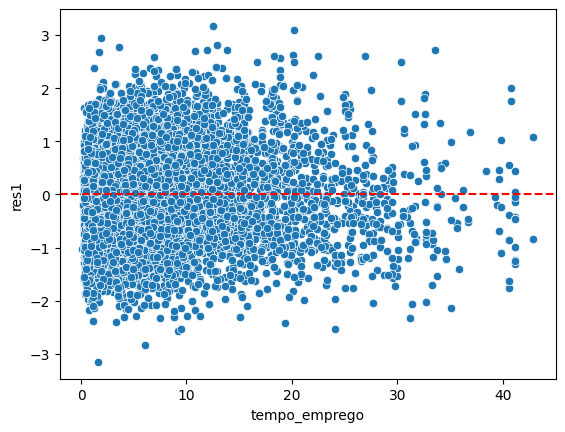

In [37]:
pr['res1'] = reg_renda_1.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res1', data = pr)

plt.axhline(y=0, color='r', linestyle='--')

In [39]:
reg_renda_2 = smf.ols('''renda ~

                                           sexo

                                           +posse_de_veiculo

                                           +posse_de_imovel

                                           +qtd_filhos

                                           +tipo_renda

                                           +educacao+estado_civil

                                           +tipo_residencia+idade

                                           +tempo_emprego

                                           +qt_pessoas_residencia


                ''', data=pr).fit()



reg_renda_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:02:01   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

In [40]:
reg_renda_3 = smf.ols('''renda ~
                                           +posse_de_imovel

                                           +qtd_filhos

                                           +tipo_renda

                                           +educacao+estado_civil

                                           +qt_pessoas_residencia

                                           + tempo_emprego


                ''', data=pr).fit()

reg_renda_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     19.32
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           2.56e-52
Time:                        14:12:54   Log-Likelihood:            -1.5644e+05
No. Observations:               15000   AIC:                         3.129e+05
Df Residuals:                   14984   BIC:                         3.130e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        4296.9933   2480.840      1.732      0.083    -565.756    9159.743
posse_de_imovel[T.True]           276.3988    144.162      1.917      0.055      -6.176     558.974
tipo_renda[T.Bolsista]          -1770.9962   2735.307     -0.647      0.517   -7132.532    3590.539
tipo_renda[T.Empresário]         -140.9468    168.262     -0.838      0.402    -470.760     188.867
tipo_renda[T.Pensionista]       -2305.8980    197.134    -11.697      0.000   -2692.305   -1919.491
tipo_renda[T.Servidor público]   1132.4841    249.699      4.535      0.000     643.043    1621.925
educacao[T.Pós graduação]       -1527.1474   1732.196     -0.882      0.378   -4922.464    1868.169
educacao[T.Secundário]            531.7172    644.664      0.825      0.409    -731.904    1795.338
educacao[T.Superior completo]     840.7663    650.080      1.293      0.196    -433.471    2115.003
educacao[T.Superior incompleto]  -512.1737    726.641     -0.705      0.481   -1936.479     912.131
estado_civil[T.Separado]          -59.2518   1229.771     -0.048      0.962   -2469.753    2351.249
estado_civil[T.Solteiro]         -283.6712   1206.566     -0.235      0.814   -2648.688    2081.345
estado_civil[T.União]           -1129.7960    262.399     -4.306      0.000   -1644.129    -615.463
estado_civil[T.Viúvo]            -737.0877   1240.403     -0.594      0.552   -3168.429    1694.253
qtd_filhos                       -702.5467   1198.310     -0.586      0.558   -3051.380    1646.287
qt_pessoas_residencia             640.8745   1196.680      0.536      0.592   -1704.764    2986.513
==============================================================================
Omnibus:                    21539.953   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11482928.055
Skew:                           8.429   Prob(JB):                         0.00
Kurtosis:                     137.493   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

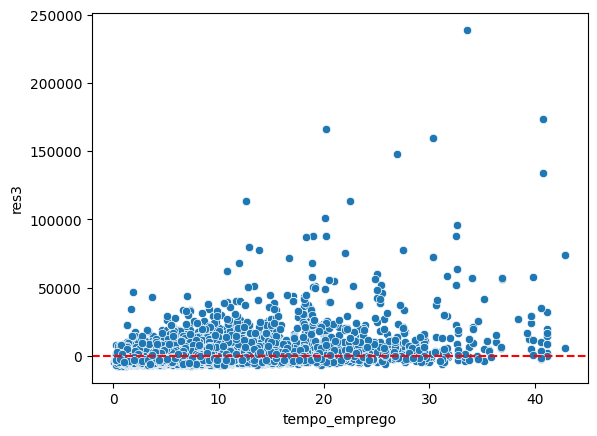

In [42]:
pr['res3'] = reg_renda_3.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res3', data = pr)

plt.axhline(y=0, color='r', linestyle='--')